In [1]:
import numpy as np 
import Shafaq as sr 
from Shafaq.Equations import *
import matplotlib.pyplot as plt 

In [2]:
n = 2 
xi , w = sr.legendre.lgl(n)
D = sr.sbp_d(n)
Q = sr.legendre.sbp_q(n)
P = sr.legendre.sbp_p(n)
flux = sr.AdvectiveFlux(a=2)
mesh = sr.Mesh1D(0, 1, 100, n, xi, w, D, P, Q, Equation1D(flux, 0.0, 0))


In [3]:
def sin_short(x):
    return np.sin(x*np.pi)

In [4]:
mesh.set_initial_condition(sin_short)
mesh.rhs()


In [ ]:
dt = 1e-2
tf = 100
t = 0
while t < tf:
    mesh.step_rk4(dt)
    t +=dt

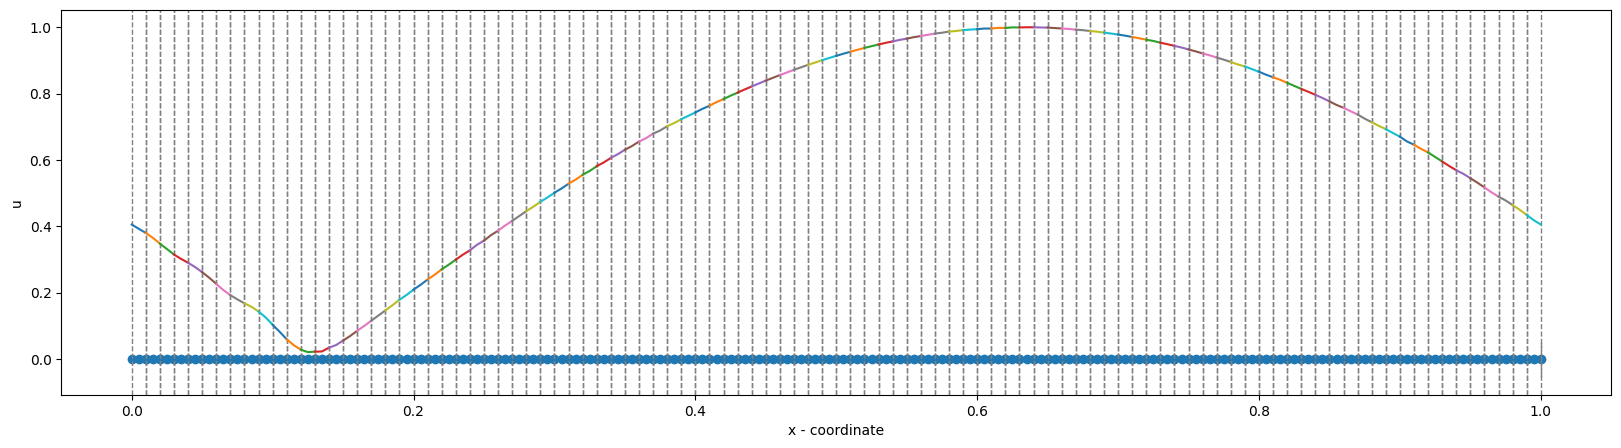

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
mesh.plot(ax=ax)
for i, elem in enumerate(mesh.elements):
    ax.plot(elem.x, elem.u, label="Solution")

In [7]:
mesh.total_energy_normalized()

np.float64(-0.0018933937339654832)

array([3.75476709e-12, 3.68966467e-02, 1.12039832e-01, 2.00515123e-01,
       2.73715784e-01, 3.09016994e-01])